# Convergence of MINRES and CG

In [1]:
using FundamentalsNumericalComputation

We will compare MINRES and CG on some quasi-random SPD problems.  The first matrix has a condition number of 100. 

In [2]:
n = 2000
density = 0.005
A = FNC.sprandsym(n,density,1e-2)
@show nnz(A);

nnz(A) = 20082


We cook up a linear system whose solution we happen to know exactly.

In [3]:
x = (1:n)/n
b = A*x;

Now we apply both methods and compare the convergence of the system residuals, using implementations imported from `IterativeSolvers`.

In [4]:
xMR,histMR = minres(A,b,reltol=1e-12,maxiter=101,log=true);
xCG,histCG = cg(A,b,reltol=1e-12,maxiter=101,log=true);

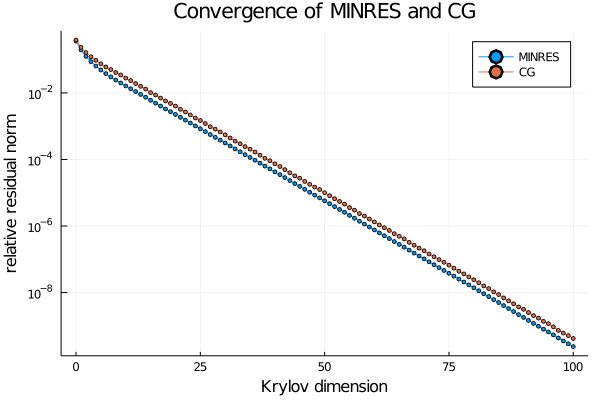

In [5]:
relres = [histMR[:resnorm] histCG[:resnorm]]/norm(b)
plot(0:100,relres,m=(:o,2),label=["MINRES" "CG"], 
    title="Convergence of MINRES and CG",
    xaxis=("Krylov dimension"), yaxis=(:log10,"relative residual norm") )

There is virtually no difference between the two methods here when measuring the residual. We see little difference in the errors as well. 

In [6]:
@show errorMR = norm( xMR - x ) / norm(x);
@show errorCG = norm( xCG - x) / norm(x);

errorMR = norm(xMR - x) / norm(x) = 3.5581196744554695e-9
errorCG = norm(xCG - x) / norm(x) = 2.2524216552094136e-9


Next we use a system matrix whose condition number is $10^4$. 

In [7]:
A = FNC.sprandsym(n,density,1e-4);

Now we find that the CG residual jumps unexpectedly, but overall both methods converge at about the same linear rate. Note from the $y$-axis scale that both methods have actually made very little progress after 100 iterations, and the gap between them is not large.

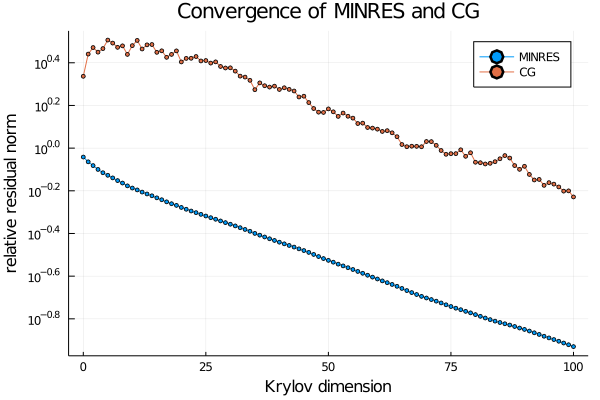

In [8]:
xMR,histMR = minres(A,b,reltol=1e-12,maxiter=101,log=true);
xCG,histCG = cg(A,b,reltol=1e-12,maxiter=101,log=true);

relres = [histMR[:resnorm] histCG[:resnorm]]/norm(b)

plot(0:100,relres,m=(:o,2),label=["MINRES" "CG"], 
    title="Convergence of MINRES and CG",
    xaxis=("Krylov dimension"), yaxis=(:log10,"relative residual norm") )

The errors confirm that we are nowhere near the correct solution in either case.

In [9]:
@show errorMR = norm( xMR - x ) / norm(x);
@show errorCG = norm( xCG - x) / norm(x);

errorMR = norm(xMR - x) / norm(x) = 554.1881048604571
errorCG = norm(xCG - x) / norm(x) = 647.5047327293506
